# Stock Analysis of Recession Resilient Companies

## Introduction

#### The goal for this code is to find stocks that have been resilient to past major US recessions, analyze what they have in common and use this information to pick which ones are most likely to keep on staying afloat during economic downturns.

In [27]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
#Function to provide financial data when called
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    df.columns
    output = df.stack(level=-1)
    return output

In [53]:
#Function takes as input dataframe and picks columns
def pickmydata(data_pack, attributes, num_days, column_number):
    col = data_pack[attributes]
    col.head()
    mytickers_name = data_pack.index.get_level_values('Symbols')
    mytickers_name = mytickers_name.unique()
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
    #print(ax.shape)
    #ax
    #save for loop plots in a list, run the list through subplots
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(attributes + ' Price ($) Over Time', fontsize=18, y=0.95)
    for x in mytickers_name:  
        fig, ax = plt.subplots(nrows = 2, ncols = column_number, figsize=(15, 12))
        #Query dataframe for the columns user asked for
        data_ticker = data_pack[data_pack.index.get_level_values('Symbols') == x]
        #Object series indexed by date
        data_ticker_attributes = col.loc[:, x]
        #20-day moving average
        short_rolling_tickers = data_ticker_attributes.rolling(window = num_days).mean()
        #Plot num_days referring to how many days are in a unit of rolling average
        ax.plot(data_ticker_attributes.index, data_ticker_attributes, label=x)
        ax.plot(short_rolling_tickers.index, short_rolling_tickers, label= 'Rolling average')
        ax.set_xlabel('Date')
        #Find only requested ticker
        ax.set_ylabel(attributes + ' Price ($)')
        ax.legend()
        output = data_ticker_attributes.describe()
    return output

In [30]:
#Function to calculate daily returns of each stock (Difference/og Price or Log(D/OG))
def stockreturns(data_pack, type_return):
    adjclose = pd.DataFrame(data_pack['Adj Close'])
    adjclose = adjclose.unstack()
    #if loop for log or relative
    if type_return == 'log' or 'logarithm':
        adjclose_ret = np.log(adjclose).diff()
    else:
        adjclose_ret = adjclose.pct_change()
    output = print(adjclose_ret)
    return adjclose_ret

In [43]:
#Cumulative/Daily return plot
def return_plot(dataframe, type_plot):
    if type_plot == 'cumulative':
        cumulative_return = dataframe.cumsum()
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(cumulative_return)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Cumulative Returns")
        ax1.set_title("Stock Cumulative Returns")
        plt.gcf().autofmt_xdate()
        ax1.legend()
        plt.show();
        
    else:
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(dataframe)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Relative Returns")
        ax1.set_title("Stock Relative Returns")
        plt.gcf().autofmt_xdate()
        ax1.legend()
        plt.show();
        

In [52]:
'''
Create a function portfolio_returns(data_pack, attributes) 
ret_pack = use data_pack['attributes'] to only use comparable prices
daily_ret = find the .pct_change() of the daily prices
weighted_ret = Weigths list * the daily returns
ret_total = sum of the (weighted) returns
print(ret_total.head())
'''

'\nFunction to get the required datasets (symbols and dates)\nSpecify which stock prices to use\nCalculate returns byusing pct_change() function\n*If we did use weighted, we would multiply it by the stock price data\nPortfolio returns = sum of the (weighted) returns\nTo visualize, we can use matplotlib\n'

## Resilient Companies

#### Companies that survive recessions tend to have basic necessities needed by consumers. This is because consumer staples and food are always in demand, even during economic downturns. Examples of such companies the likes of Walmart, Kroger and General Mills

In [45]:
data_pack = readmydata(tickers=['^GSPC', 'WMT', 'KR', 'GIS', 'HRL', 'CPB'], start_date='2007-12-01', end_date='2009-06-30')
#data_pack.head(10)

#### Looking at the returns of these companies, we notice that they tent to fare much better during tough financial times compared to their counterparts.

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

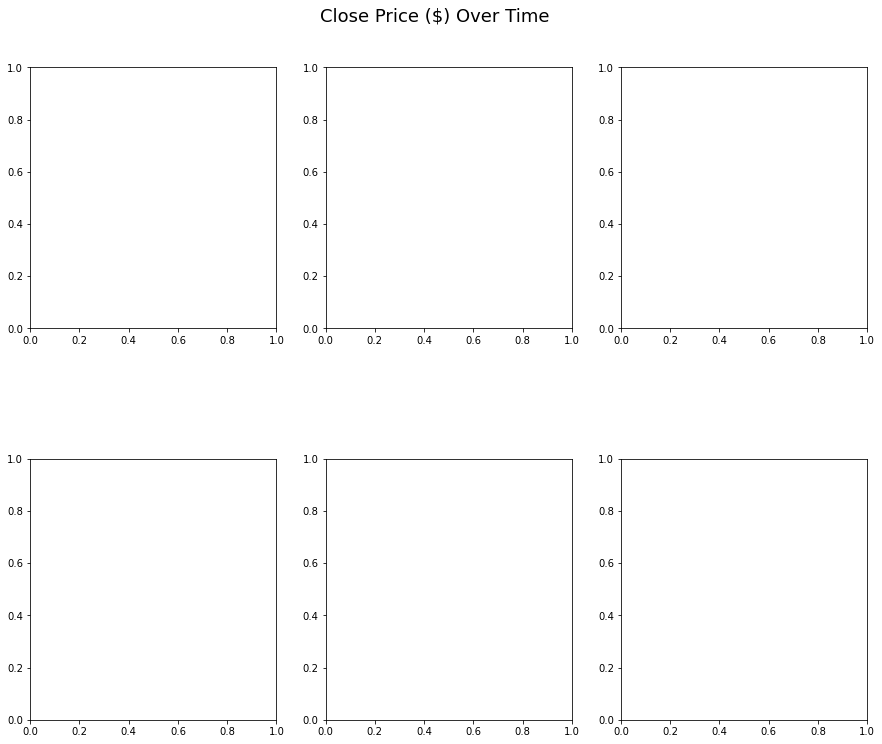

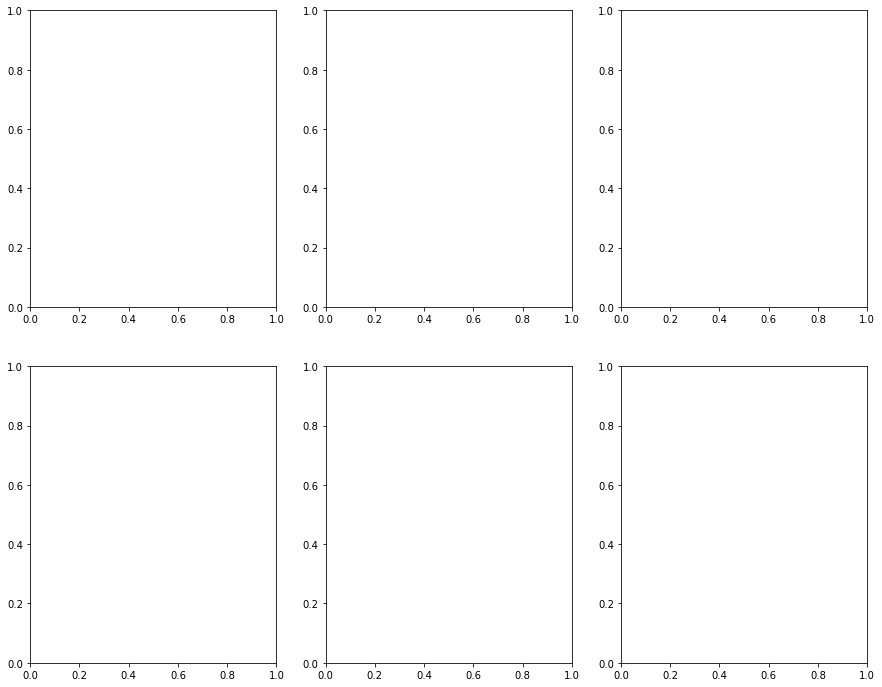

In [54]:
pickmydata(data_pack, "Close", 30, 3)
data_plot = stockreturns(data_pack, 'relative')

#### Calculating returns and visualizing the data. We are able to see a a much more consistent return in the companies deemed resilient than those whose stock price was deemed more volatile.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


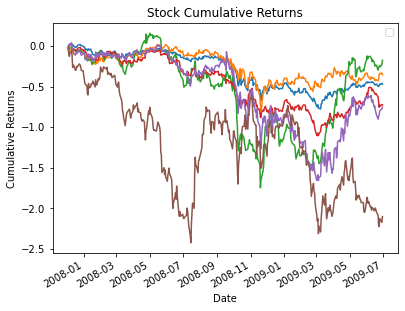

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


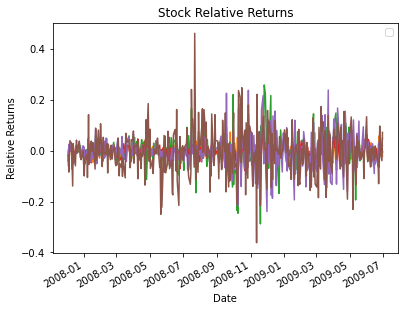

In [47]:
return_plot(data_plot, 'cumulative')
return_plot(data_plot, 'relative')

#### Looking for trends, we can see that retail company stocks would hit a dip during the recession, but the precentage of the dip would be less extreme than that of the S&P.

## Sensitive Companies

#### Companies that tend to perform terribly are those who depend on consumers being able to afford big ticket item, such as cars, housing and plane tickets. The reasons depend on the industry, for example, though the car industry is quickly  becoming a necessity, are quite expensive and that alone makes the demand for them fall during economic downturns.

In [35]:
data_pack = readmydata(tickers=['^GSPC', 'AMT', 'F', 'BA', 'HST', 'AAL'], start_date='2007-12-01', end_date='2009-06-30')

#### In order to understand which future companies are at a greater risk than average during economical downturns, it is important to look back in history and see which industries tend to suffer the most during such events.

In [36]:
data_pack.head(10)

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2007-12-03 ^GSPC    1472.420044  1472.420044  1481.160034  1470.079956   
           AMT        36.882488    44.919998    45.619999    44.750000   
           F           4.832798     7.250000     7.520000     7.230000   
           BA         67.270576    91.790001    93.199997    91.660004   
           HST        12.313084    18.766520    18.883993    18.374939   
           AAL        18.788834    19.930000    21.209999    19.820000   
2007-12-04 ^GSPC    1462.790039  1462.790039  1471.339966  1460.660034   
           AMT        34.854462    42.450001    44.389999    42.360001   
           F           4.646153     6.970000     7.240000     6.930000   
           BA         65.951401    89.989998    91.790001    89.849998   

Attributes                 Open        Volume  
Date       Symbols                             
2007-12-03 ^GSPC    1479.630005  3.323250e+09  
           AMT        45.220001  3.452200e+06  
           F           7.520000  3.493680e+07  
           BA         92.500000  5.423400e+06  
           HST        18.580519  3.745738e+06  
           AAL        21.209999  2.127800e+06  
2007-12-04 ^GSPC    1471.339966  3.343620e+09  
           AMT        44.389999  6.066100e+06  
           F           7.200000  5.544510e+07  
           BA         91.430000  7.080900e+06

In [51]:
pickmydata(data_pack, "Close", 30, 3)

TypeError: pickmydata() takes 3 positional arguments but 4 were given

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           Adj Close                                                  
Symbols        ^GSPC       AMT         F        BA       HST       AAL
Date                                                                  
2007-12-03       NaN       NaN       NaN       NaN       NaN       NaN
2007-12-04 -0.006562 -0.056556 -0.039386 -0.019805 -0.039910 -0.015677
2007-12-05  0.015076  0.008912  0.001434  0.007859  0.025195 -0.083958
2007-12-06  0.014925 -0.016004  0.011396  0.011837  0.024060 -0.028108
2007-12-07 -0.001780  0.012495  0.000000  0.014924  0.000000  0.039681
...              ...       ...       ...       ...       ...       ...
2009-06-24  0.006503  0.058907  0.017922 -0.059884  0.030365 -0.009259
2009-06-25  0.021218  0.013187  0.008842  0.028863  0.038270  0.097422
2009-06-26 -0.001479 -0.005944 -0.012400 -0.015401  0.012438 -0.008475
2009-06-29  0.009024  0.010922  0.029853  0.018219  0.015942 -0.039051
2009-06-30 -0.008567 -0.021648  0.048955 -0.003523  0.020470  0.072527

[397 

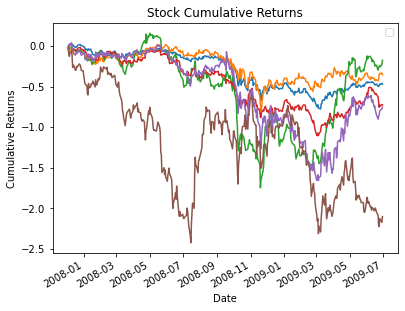

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


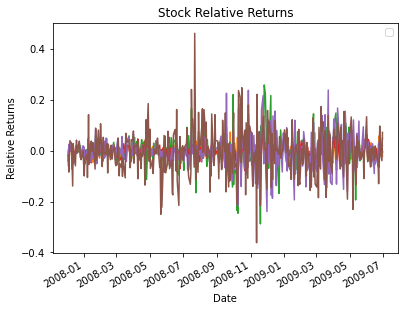

In [42]:
data_plot = stockreturns(data_pack, 'relative')
return_plot(data_plot, 'cumulative')
return_plot(data_plot, 'relative')

#### These companies have got a dip that is either as sharp or worse than the S&P 500. Unlike the discount retail companies, the industries that these commpanies belong to rely on consumer spending large amounts of money, a feature that is stressed during economic downturns. Of course it is extremely difficult to predict what type of disasted could impact the stock market tomorrow, it is still a great exercise to understand which buisness tend to weather harsh economical storms versus those who don't.